In [ ]:
!pip install scikit-image
!pip install scipy

In [ ]:
import skimage
from skimage import io, color, filters, morphology
import numpy as np
from scipy import ndimage as filterss

Example image of leaf

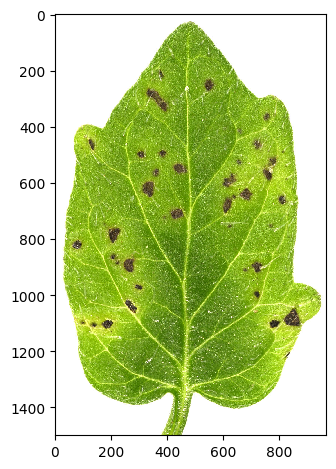

In [ ]:
im = skimage.io.imread("/content/drive/MyDrive/collmer.jpg")
skimage.io.imshow(im)

Leaf Boundary:

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


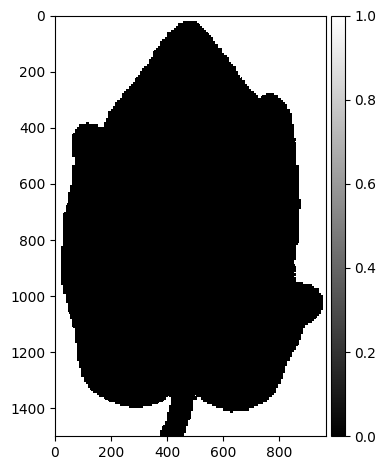

In [ ]:
gray_image = color.rgb2gray(im)

# Apply edge detection
edges = filters.sobel(gray_image)

skimage.io.imshow(edges)
# Use morphological dilation to enhance the edges
edges_dilated = morphology.dilation(edges)
#skimage.io.imshow(edges_dilated)
# Threshold the image to obtain the leaf boundary
leaf_boundary_maskx = np.where(edges_dilated > 0, 0, 1)
skimage.io.imshow(leaf_boundary_maskx, cmap = 'gray')




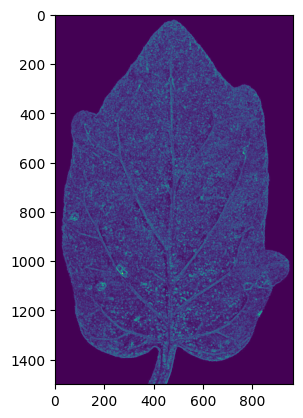

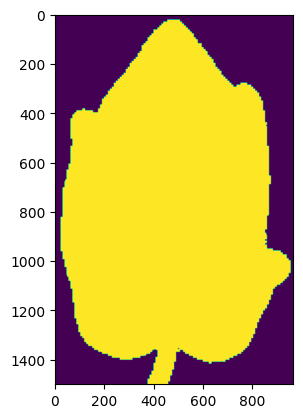

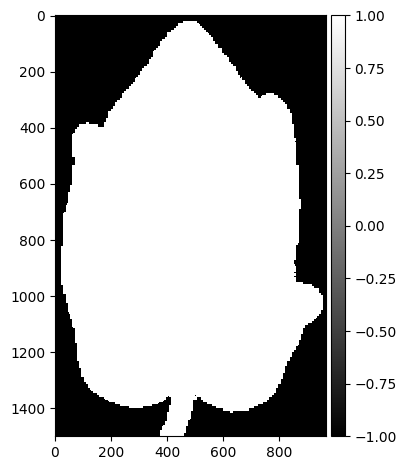

In [ ]:
import matplotlib.pyplot as plt
edges = skimage.filters.sobel(gray_image)
plt.imshow(edges_dilated)
plt.show()

edges_dilated = morphology.dilation(edges)


leaf_boundary_mask = np.where(edges_dilated > 0, 1, 0)

plt.imshow(leaf_boundary_mask)
plt.show()


leaf_interior_mask = np.where(edges_dilated == 0, 1, 0)


leaf_boundary_only_mask = leaf_boundary_mask - leaf_interior_mask


skimage.io.imshow(leaf_boundary_only_mask ,cmap='gray')


Vein area for leaves finder

In [ ]:
skimage.io.imshow(labels)

NameError: name 'skimage' is not defined

In [ ]:
thresh = skimage.filters.threshold_otsu(gray_image)
binary = gray_image > thresh
binary = skimage.morphology.remove_small_objects(binary,min_size=20)
plt.imshow(binary)
plt.show()
labels = skimage.measure.label(binary)
binarylabels = skimage.morphology.binary_dilation(labels)
plt.imshow(binarylabels)
plt.imshow(gray_image)
plt.show()
plt.imshow(labels)
plt.show()
skeletons = skimage.morphology.skeletonize(binary)

plt.imshow(skeletons)
plt.show()

In [ ]:
blurred_image = filters.gaussian(gray_image, sigma=4)
plt.imshow(blurred_image)
plt.show()

In [ ]:
from skimage import io, color, filters, morphology, measure
leaf_smooth = filters.gaussian(leaf_boundary_only_mask, sigma=1)

# Step 2: Thresholding
thresh = filters.threshold_otsu(leaf_smooth)
binary = leaf_smooth > thresh
plt.imshow(binary)
plt.show()
# Step 3: Edge Detection
edges = filters.sobel(binary)
plt.imshow(edges)
plt.show()



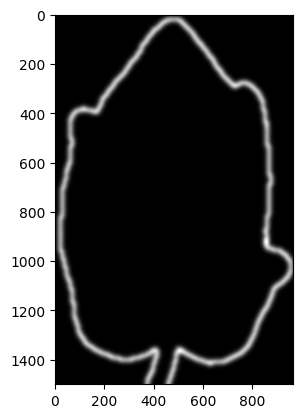

In [ ]:
#Leaf Lesion Extractor
smooth = filters.gaussian(edges,sigma=10)

plt.imshow(smooth,cmap='gray')
plt.show()



/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:157: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  return func(*args, **kwargs)


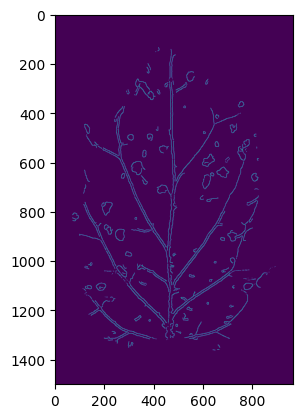

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


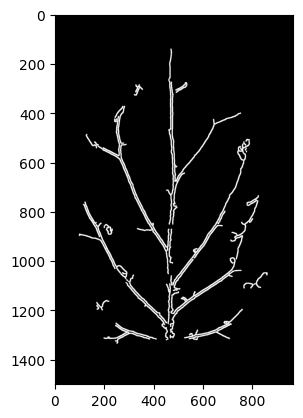

In [ ]:
imcanny = skimage.feature.canny(gray_image, sigma=3)
newimage = np.where((imcanny > 0) & (smooth <= 0) & (labels<=0), 1, 0)

newcheck = skimage.morphology.remove_small_objects(newimage,min_size=20)
veinimage = np.where(labels>2,1,0)
sobelly = filters.sobel(veinimage)

veinimageblur = filters.gaussian(sobelly,sigma=4)


newcheck2 = np.where((newcheck>0) & (veinimageblur>0),1,0)

plt.imshow(newcheck)
plt.show()
sobelly2 = filters.sobel(newcheck2)
sobelly2 = skimage.morphology.binary_dilation(sobelly2)
print(sobelly2)
sobellyimproved = skimage.morphology.remove_small_objects(sobelly2, min_size=600, connectivity=2)
plt.imshow(sobellyimproved,cmap='gray')
plt.show()


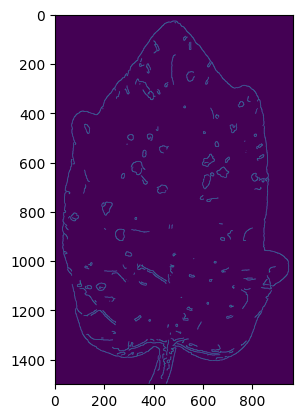

In [ ]:
finimage = np.where((sobellyimproved==0) & (imcanny>0),1,0)
plt.imshow(finimage)
plt.show()

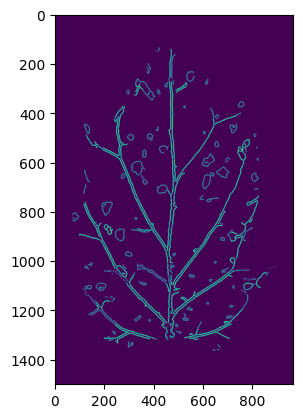

In [ ]:
newveintry = np.where((binarylabels > 0) & (smooth <= 0) & (labels<=0), 1, 0)
newveintry2 = skimage.morphology.remove_small_objects(newimage, min_size=100, connectivity=6)
newveintry2 = skimage.morphology.binary_dilation(newveintry2)
newveintry3 = np.where((newveintry2>0) & (finimage<=0),1,0)
plt.imshow(newveintry3)
plt.show()

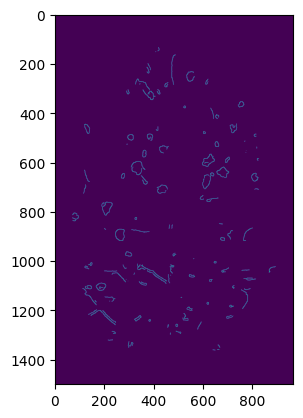

In [ ]:
variable2 = np.where((imcanny>0) & (smooth<=0) , 1, 0)
variable3 = np.where((imcanny>0) & (variable2<=0),1,0)
variable4 = np.where((finimage>0) & (variable3<=0),1,0)
plt.imshow(variable4)
plt.show()

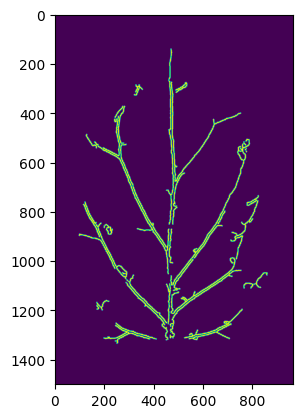

In [ ]:
cool = np.where((sobellyimproved>0) & (variable4<=0),1,0)
plt.imshow(cool)
plt.show()

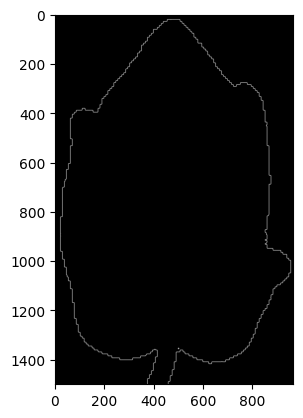

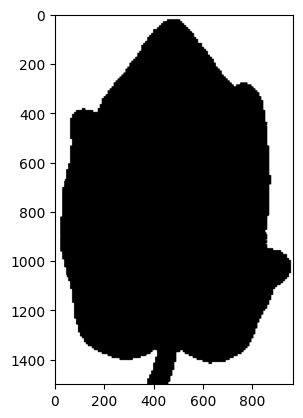

In [ ]:
from skimage.segmentation import flood, flood_fill
plt.imshow(edges,cmap='gray')
plt.show()
filled_edges = flood_fill(edges,(0,0),127)
plt.imshow(filled_edges,cmap='gray')
plt.show()

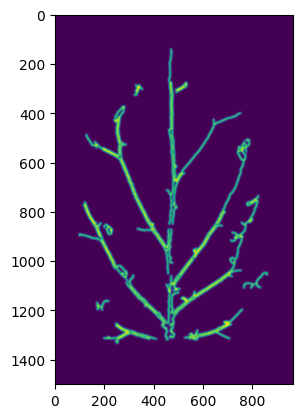

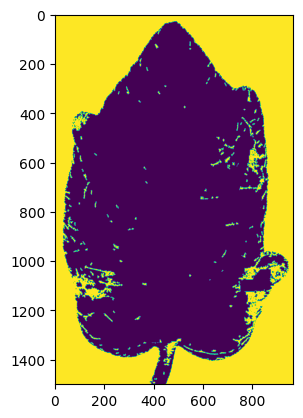

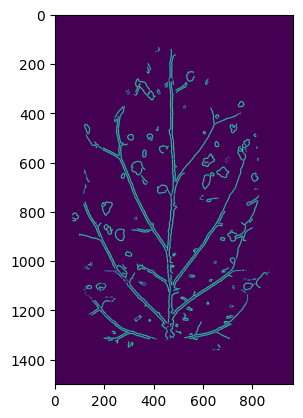

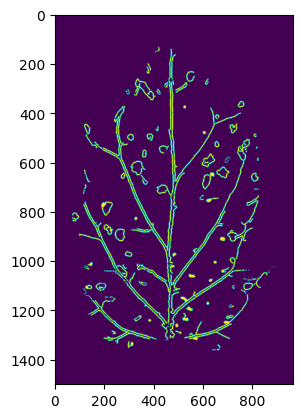

In [ ]:
blurreds = filters.gaussian(sobellyimproved,sigma=3)
plt.imshow(blurreds)
plt.show()

testerr = np.where((binarylabels>0) & (blurreds<=0),1,0)
plt.imshow(testerr)
plt.show()

testerr2 = np.where((newveintry2>0) & (testerr<=0),1,0)
plt.imshow(testerr2)
plt.show()

testerr3 = np.where(testerr2>0.99,1,0)

testerr3 = skimage.morphology.binary_dilation(testerr3)
testerr3 = skimage.morphology.remove_small_holes(testerr3)
testerr3 = skimage.restoration.denoise_bilateral(testerr3, sigma_color=0.02)
plt.imshow(testerr3)
plt.show()


Alright here are the latest renditions of each type of image for the leaves


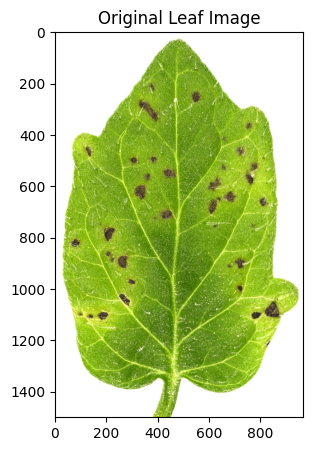

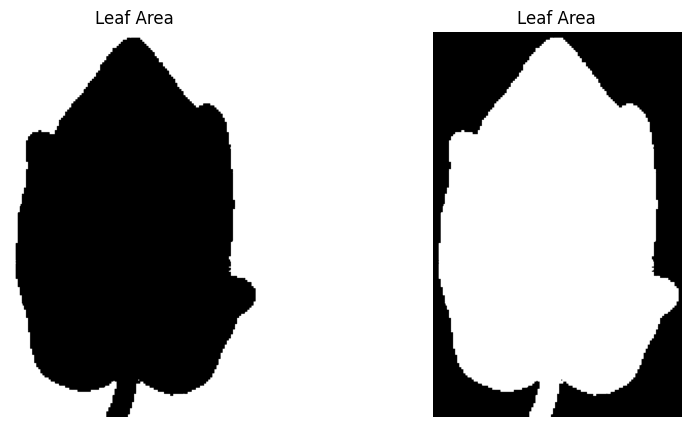

(-0.5, 966.5, 1499.5, -0.5)

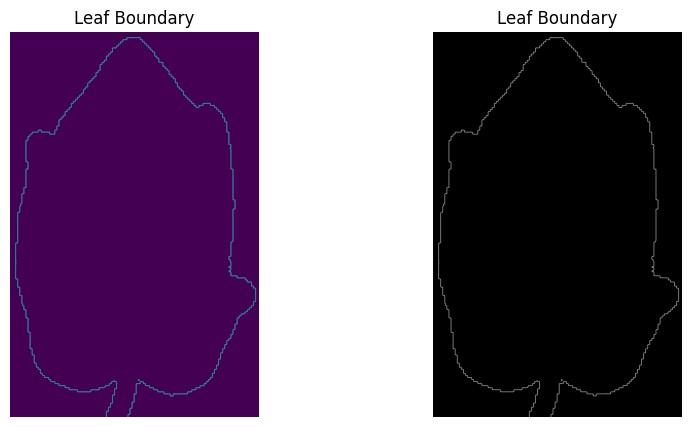

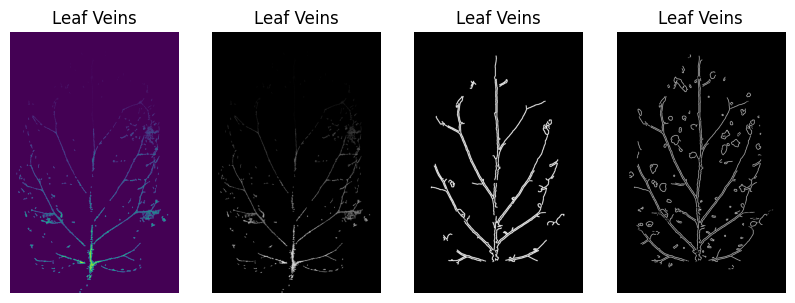

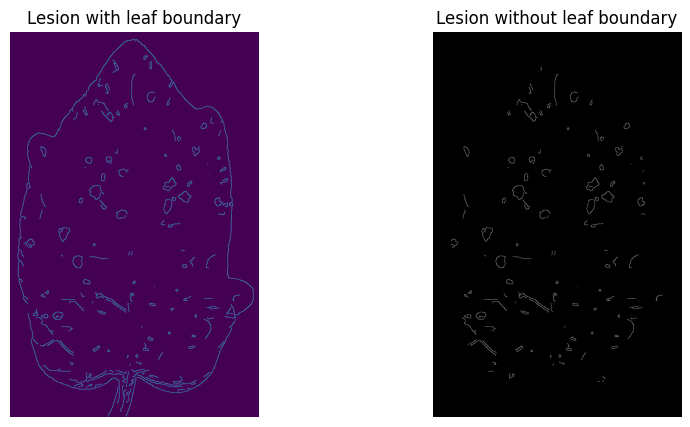

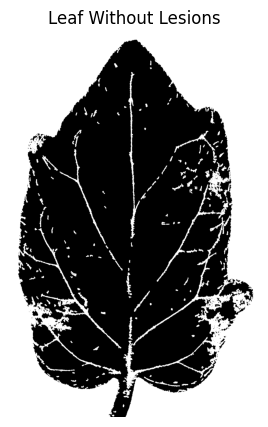

In [ ]:

fig, axes = plt.subplots(1,1, figsize=(10,5))
axes.imshow(im)
axes.set_title('Original Leaf Image')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(leaf_boundary_maskx, cmap=plt.cm.gray)
axes[0].set_title('Leaf Area')
axes[0].axis('off')

axes[1].imshow(leaf_boundary_only_mask, cmap=plt.cm.gray)
axes[1].set_title('Leaf Area')
axes[1].axis('off')

plt.show()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(edges)
axes[0].set_title('Leaf Boundary')
axes[0].axis('off')

axes[1].imshow(edges, cmap=plt.cm.gray)
axes[1].set_title('Leaf Boundary')
axes[1].axis('off')

fig, axes = plt.subplots(1, 4, figsize=(10, 5))
axes[0].imshow(labels)
axes[0].set_title('Leaf Veins')
axes[0].axis('off')

axes[1].imshow(labels, cmap=plt.cm.gray)
axes[1].set_title('Leaf Veins')
axes[1].axis('off')

axes[2].imshow(sobellyimproved, cmap=plt.cm.gray)
axes[2].set_title('Leaf Veins')
axes[2].axis('off')

axes[3].imshow(newveintry2, cmap=plt.cm.gray)
axes[3].set_title('Leaf Veins')
axes[3].axis('off')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(finimage)
axes[0].set_title('Lesion with leaf boundary')
axes[0].axis('off')

axes[1].imshow(variable4, cmap=plt.cm.gray)
axes[1].set_title('Lesion without leaf boundary')
axes[1].axis('off')

fig, axes = plt.subplots(1,1,figsize=(10,5))
axes.imshow(binarylabels, cmap='gray')
axes.set_title('Leaf Without Lesions')
axes.axis('off')




